# DataSet #3: Mobilitat entre Municipis

Autor: Marc Bosch Manzano<br>
Data: Octubre 2025<br>
Iteració: 2a<br>
Projecte: MobiCat

## Anàlisi de les Distribucions dels Atributs

### Importació de Llibreries

In [1]:
PACKAGES = ["pandas", "matplotlib", "numpy", "seaborn"]
COLORS = ["viridis", "plasma", "inferno", "magma", "cividis"]

import importlib
import sys
sys.path.append('../mobicat_python_utils')

import utils
importlib.reload(utils)

import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import IPython.display 
IPython.display.clear_output()

### Importació de les Dades

**Important**: importa al directori *test-data* els següents fitxers o canviar el directori pel directori amb els fitxers. 
```bash
    movilidad_barrios_2023-01_origen.csv
    movilidad_municipios_2023-01_origen.csv
    movilidad_mun_barrios_2023-01_origen.csv
```

In [2]:
mobility_directory = "./test-data/"
mobility_file_name = "movilidad_municipios_2023-01_origen.csv"
mobility_file_path = os.path.join(mobility_directory, mobility_file_name)

mobility_df = pd.read_csv(mobility_file_path, dtype=str)
mobility_df["viajes"] = mobility_df["viajes"].astype(int)
mobility_df["day"] = pd.to_datetime(mobility_df["day"])
mobility_df = mobility_df[mobility_df["viajes"] > 0]

Trobem la distribució dels viatges per municipi.

In [3]:
municipalities_df = utils.group_by_municipality(mobility_df)

municipalities_df

,municipio,municipio_name,viajes
0,08001,Abrera,926039
1,08002,Aguilar de Segarra,31743
2,08003,Alella,676085
3,08004,Alpens,2064
4,08005,"Ametlla del Vallès, L'",339925
...,...,...,...
298,08901,Rupit i Pruit,2221
299,08902,Vilanova del Vallès,240882
300,08903,Sant Julià de Cerdanyola,859
301,08904,Badia del Vallès,224734


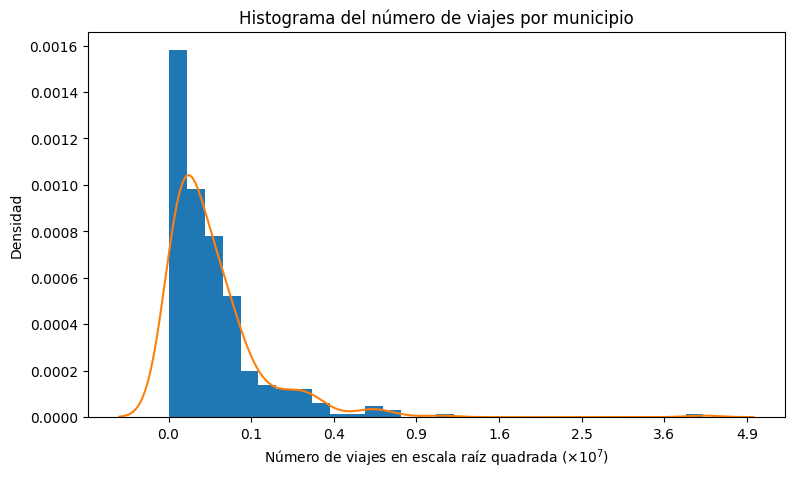

In [4]:
plt.figure(figsize=(9, 5))

plt.hist(
    x=np.sqrt(municipalities_df["viajes"]),
    density=True,
    bins=30,
)

sns.kdeplot(
    x=np.sqrt(municipalities_df["viajes"]),
)

plt.title("Histograma del número de viajes por municipio")
plt.xlabel("Número de viajes en escala raíz quadrada $(×10^7)$")
plt.ylabel("Densidad")
ticks = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
labels = [t**2/1e7 for t in ticks]
plt.xticks(ticks, labels)

plt.show()

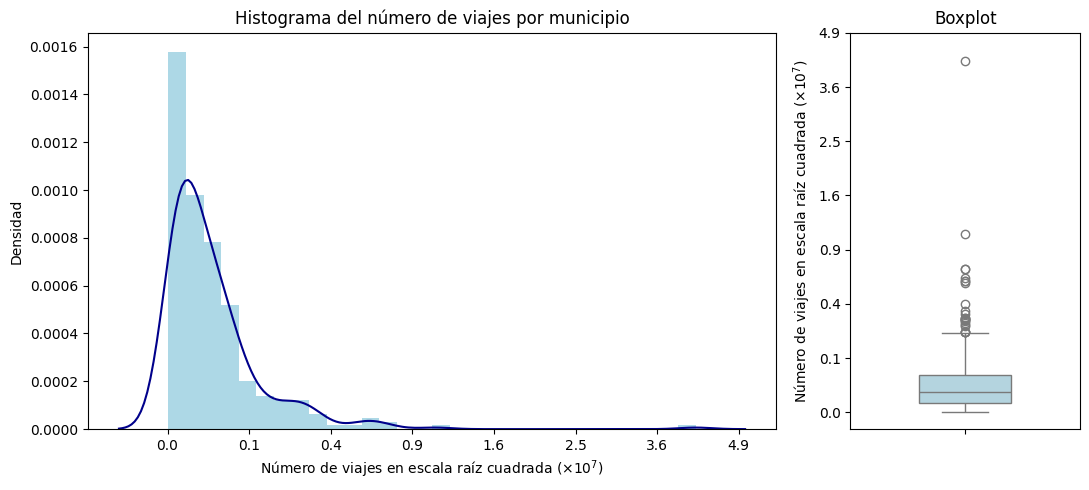

In [5]:
x = np.sqrt(municipalities_df["viajes"])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5), gridspec_kw={'width_ratios': [3, 1]})

ticks = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
labels = [t**2/1e7 for t in ticks]

ax1.hist(
    x,
    density=True,
    bins=30,
    color="lightblue",
    alpha=1.0
)
sns.kdeplot(
    x=x,
    ax=ax1,
    color="darkblue"
)

values_label = "Número de viajes en escala raíz cuadrada $(×10^7)$"

ax1.set_title("Histograma del número de viajes por municipio")
ax1.set_xlabel(values_label)
ax1.set_ylabel("Densidad")



ax1.set_xticks(ticks)
ax1.set_xticklabels([f"{l:.1f}" for l in labels])

sns.boxplot(
    y=x,
    ax=ax2,
    color="lightblue",
    width=0.4
)

ax2.set_title("Boxplot")
ax2.set_ylabel(values_label) 
ax2.set_xlabel("") 
ax2.set_yticks(ticks)
ax2.set_yticklabels([f"{l:.1f}" for l in labels])

plt.tight_layout()
plt.show()

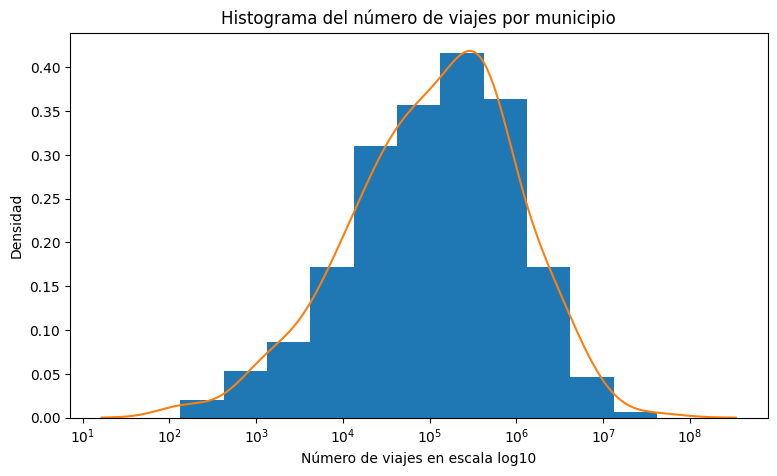

In [6]:
plt.figure(figsize=(9, 5))

plt.hist(
    x=np.log10(municipalities_df["viajes"]),
    density=True,
    bins=11
)

sns.kdeplot(
    x=np.log10(municipalities_df["viajes"]),
)

plt.title("Histograma del número de viajes por municipio")
plt.xlabel("Número de viajes en escala log10")
plt.ylabel("Densidad")
ticks = [ 1, 2, 3, 4, 5, 6, 7, 8] 
labels = [f"$10^{t}$" for t in ticks]
plt.xticks(ticks, labels)
plt.show()